# Exploratory data analysis

Pandas provides a rich set of plotting tools for exploratory data analysis, however there is a huge ecosystem avaiable for plotting not just maps but charts of various types.  In fact I expect to create an entire course about Geospatial Data Visualization.

GeoPandas in that we can integrate graphical output with our spatial and tabular data.  Keep in mind however that this lecture is just the briefest of introduction as to what is possible.

Lets load some data.

In [1]:
%matplotlib inline
import geopandas as gpd

raptor = gpd.read_file("data/Raptor_Nests.shp")
raptor.rename(inplace=True, columns={"postgis_fi":"gid", "lat_y_dd":"latitude", "long_x_dd":"longitude"})
raptor

,gid,latitude,longitude,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297)
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975)
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432)
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443)


One of the most common types of exploratory data analysis is plotting out a histogram of numeric data to look at its distribution.  

The Pandas hist() method returns a histogram of all numeric fields in the DataFrame.

array([[<Axes: title={'center': 'gid'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Nest_ID'}>]], dtype=object)

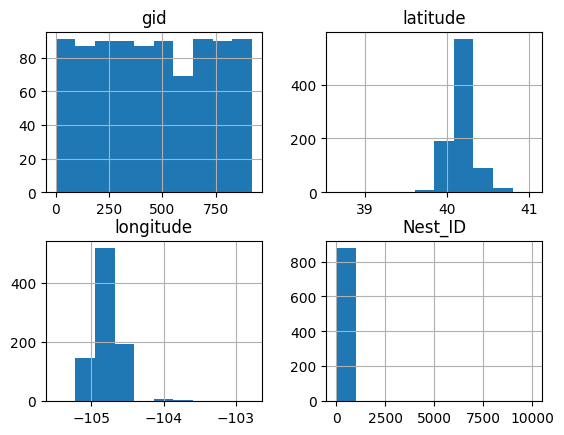

In [2]:
raptor.hist()

You can also get a histogram of a specific data series by calling the hist method on the series.

<Axes: >

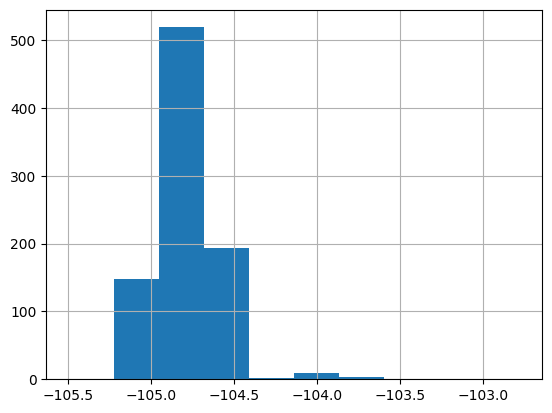

In [3]:
raptor['longitude'].hist()

Of course you can include parameters to limit the column, partition the histogram by a categorical column, specify bin size, output size and colors, etc. Please, refer to the documentation for the full set of parameters available.

array([[<Axes: title={'center': 'ACTIVE NEST'}>,
        <Axes: title={'center': 'COULD NOT SEE NEST'}>],
       [<Axes: title={'center': 'FLEDGED NEST'}>,
        <Axes: title={'center': 'INACTIVE NEST'}>]], dtype=object)

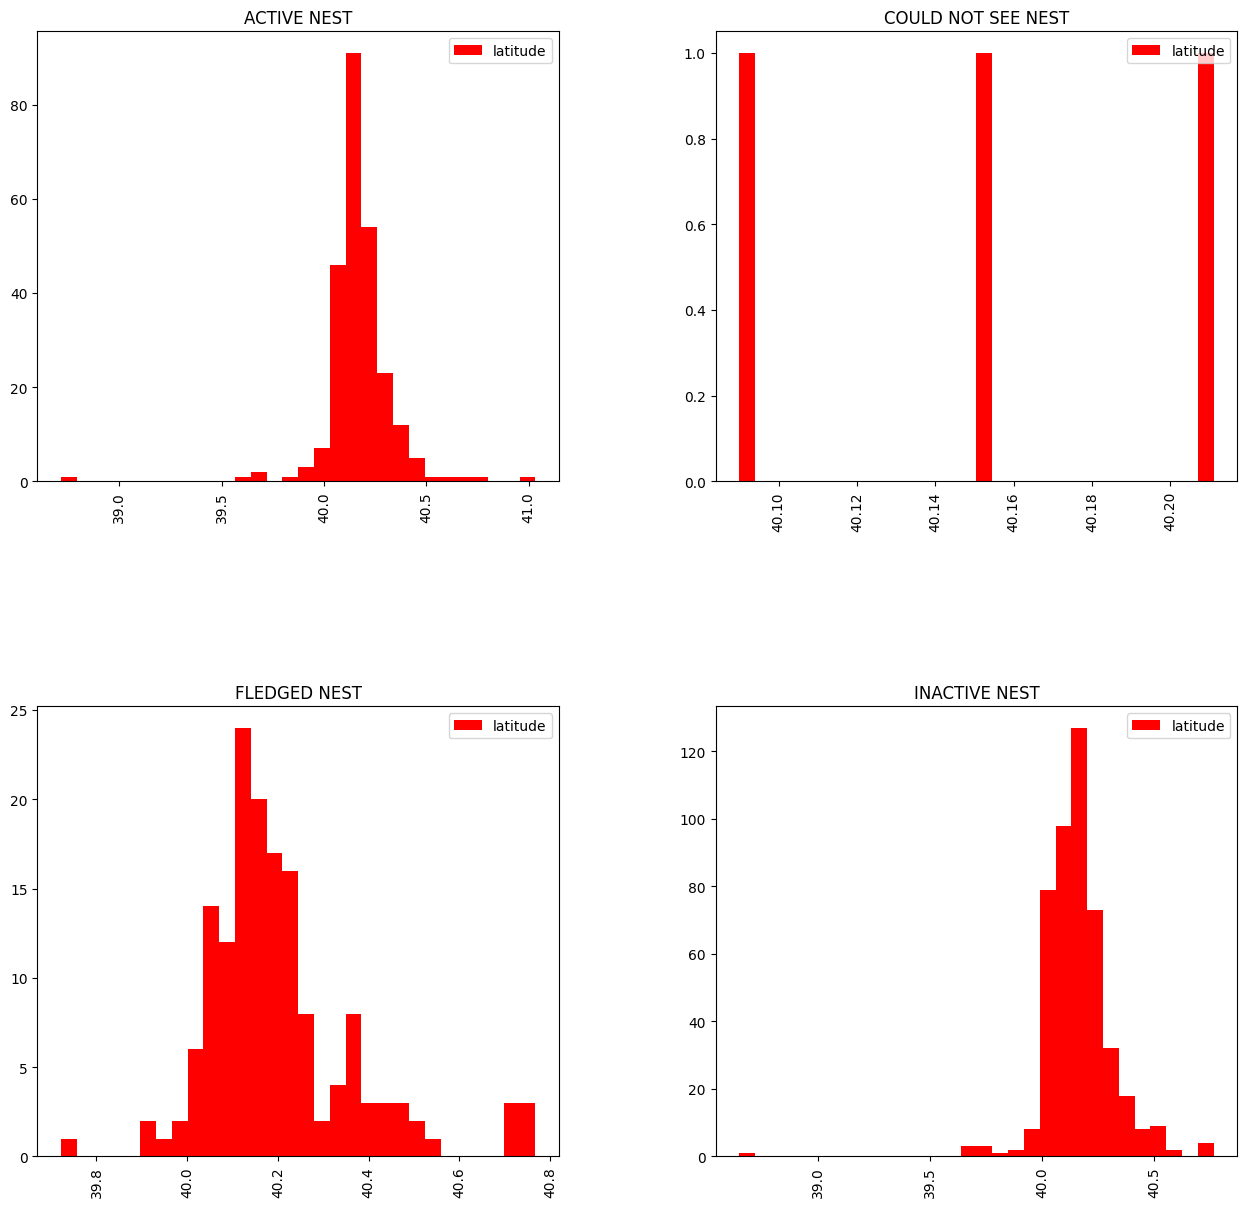

In [4]:
raptor.hist(column = 'latitude', by='recentstat', legend=True, bins=30, figsize=(15,15), color='red')

We can also use the bloxplot method to see boxplots for numerical data partitioned by a categorical value as follows

<Axes: title={'center': 'latitude'}, xlabel='recentstat'>

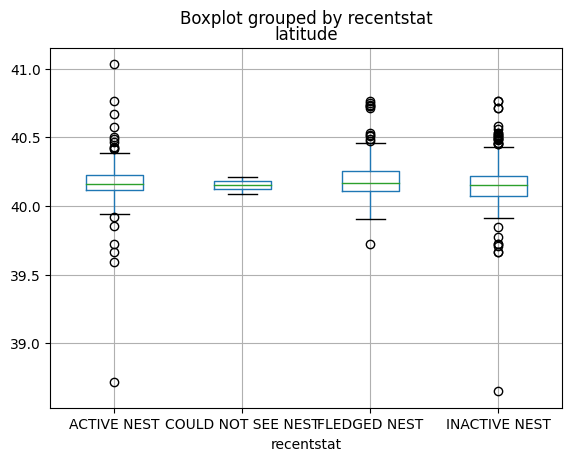

In [5]:
raptor.boxplot(column='latitude', by='recentstat')

Of course, if we just use the plot method on a GeoDataFrame the output will be a map of the geometry column by default.

<Axes: >

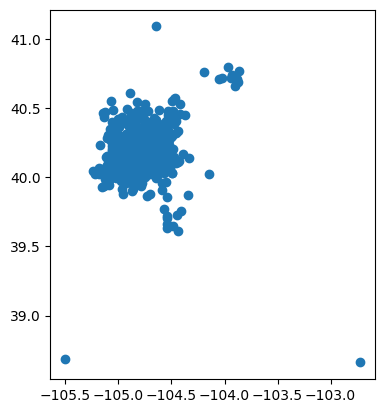

In [6]:
raptor.plot()

but we can also call some of the Pandas plotting method on a single Pandas data series.

<Axes: >

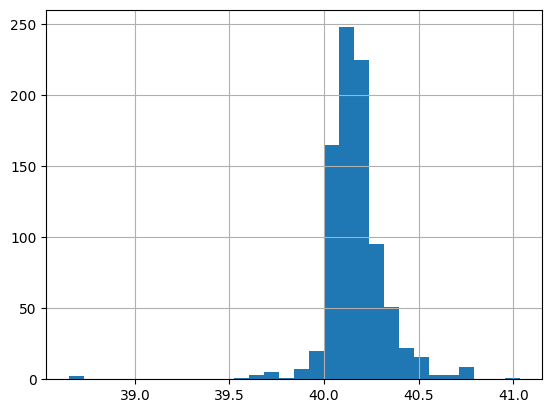

In [7]:
raptor['latitude'].hist(bins=30)

The plot method on a non-geometry dataseries returns a line graph, with the index values on the x axis.

<Axes: >

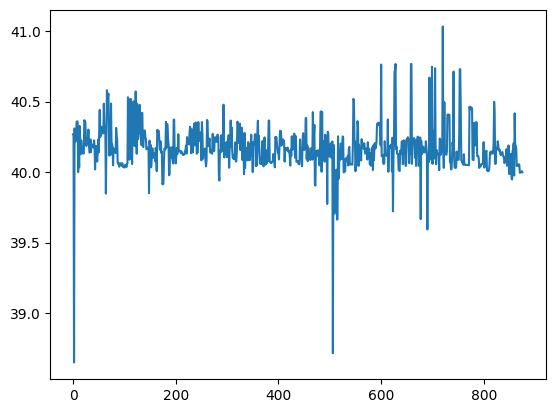

In [8]:
raptor['latitude'].plot()

If you want to use pandas plotting methods on your tabular data you can easily reduce the GeoDataFrame to a normal Pandas DataFrame simply by subsetting the dataframe by column and not including the geometry field.

In this example we create a scatterplot of longitude and latitude which presents a similar output to the GeoPandas plot method although the scaling of the axes is not guaranteed to be equal

<Axes: xlabel='longitude', ylabel='latitude'>

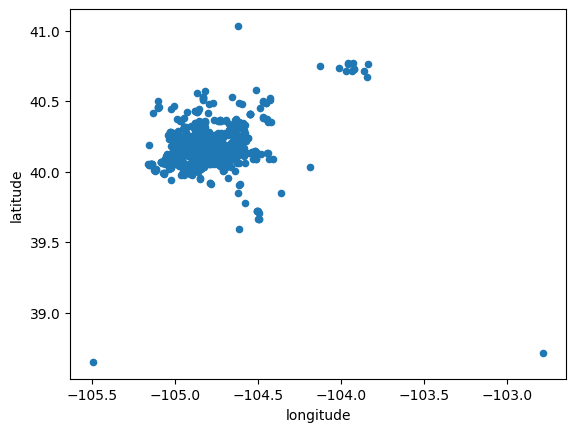

In [9]:
raptor[['longitude', 'latitude', 'recentstat']].plot.scatter(x='longitude', y='latitude')

For some plots you will need to summarize the dataframe. In this example we summarize the raptor data by the recentstat category and use the count aggregator to create a new dataset that is appropriate to use with a pie chart.

In [10]:
stat_count = raptor[['longitude', 'recentstat']].groupby('recentstat').agg('count')
stat_count

,longitude
recentstat,
ACTIVE NEST,251
COULD NOT SEE NEST,3
FLEDGED NEST,155
INACTIVE NEST,468


<Axes: ylabel='longitude'>

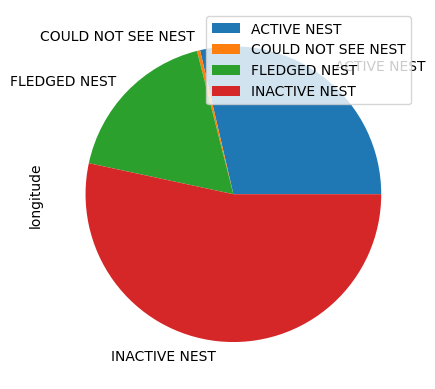

In [11]:
stat_count.plot.pie(y='longitude')

This same data coud be used in a bar chart

<Axes: xlabel='recentstat'>

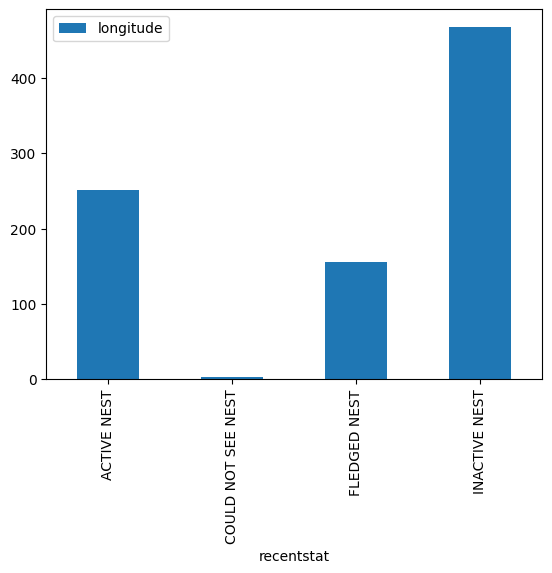

In [12]:
stat_count.plot.bar(y='longitude')

Keep in mind that Pandas and GeoPandas are using matplotlib in the background for plotting.  Although the syntax in Pandas is simpler in my opinion, using matplotlib directly is also possible and provides a stunning amount of flexibility.

Other data vizualization libraries you can use with GeoPandas include Seaborn which also uses matplotlib in the background but adds some nice functionality with simpler syntax.  Plotly is another package for vizualizations but Plotly provides interactive charts that allow you to see actual data values when hovering the mouse over the chart, zoom in or out,  and much more.